In [1]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import re


C:\Users\ANUBRATA\AppData\Local\Temp\ipykernel_2436\4003776896.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


!pip install pandas
!pip install geopy
!pip install matplotlib
!pip install re

## Get CSV files

In [2]:
Train = pd.read_csv('./Train Data set.csv')
Metro = pd.read_csv('./Metro Data set.csv')
Bus = pd.read_csv('./Bus Data set.csv')
Auto = pd.read_csv('./Auto Data set.csv')

# Checking Sizes of Data

In [3]:
print(Train.shape , Metro.shape, Bus.shape, Auto.shape)

(321, 3) (40, 3) (1660, 3) (1660, 3)


# Helper Functions 

In [4]:
def Merge_Nodes(point1 , point2): #are_close_points
    if (geodesic(point1, point2).meters <= 100):
        return True 
    else :
        return False

In [5]:
def getNodes(Transport): #compress_coordinate
    NodePoints = []
    for i in range(Transport.shape[0]) :
        NodePoints.append((Transport['lat'][i], Transport['long'][i]))
    return NodePoints

## Get List of Nodes

In [6]:
TrainNodes = getNodes(Train)

In [7]:
MetroNodes = getNodes(Metro)

In [8]:
BusNodes = getNodes(Bus)

In [9]:
AutoNodes = getNodes(Auto)

BusNodes

# Combining nodes in range of 100 meters

In [10]:
Nodes = {}

In [11]:
def getCloseNodes(Node_List_1, Node_List_2): # collect_close_vertex
    List_1 = []
    List_2 = []
    for i in range(len(Node_List_1)):
        for j in range(len(Node_List_2)):
            if Merge_Nodes(Node_List_1[i],Node_List_2[j]):
                List_1.append(i)
                List_2.append(j)
    return [List_1,List_2]

In [12]:
def add_Transport(df): # populate_Nodes_with_Transport
    dfNodes = getNodes(df)
    globalNodes = []
    
    for node in Nodes:
        globalNodes.append(node)
        
    b = getCloseNodes(globalNodes, dfNodes)
    
    for i in range (len (b[0])):
        Nodes[ globalNodes[b[0][i]] ].append(df.iloc[:,0][b[1][i]])
    
    for i in range (len(dfNodes)):
        if i in b[1]:
            continue
        Nodes[dfNodes[i]] = [ df.iloc[:,0][i] ]  

In [13]:
a = getCloseNodes(TrainNodes, MetroNodes)

for i in range (len (a[0])):
    Nodes[ TrainNodes[a[0][i]] ] = [ Metro.iloc[:,0][a[1][i]], Train.iloc[:,0][a[0][i]] ]
    
for i in range (len(TrainNodes)):
    if i in a[0]:
        continue
    Nodes[TrainNodes[i]] = [ Train.iloc[:,0][i] ]
    
for i in range (len(MetroNodes)):
    if i in a[1]:
        continue
    Nodes[MetroNodes[i]] = [ Metro.iloc[:,0][i] ]

In [ ]:
#add new transport here 👇👇👇👇👇👇
add_Transport(Bus)
add_Transport(Auto)

In [ ]:
Nodes

# Visualise In Graph

In [ ]:
Nodes_x = []
Nodes_y = []

for key in Nodes:
    Nodes_x.append(key[0])
    Nodes_y.append(key[1])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Nodes_x,Nodes_y, marker='.', color='blue', label='Data Points', s=5, )
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Nodes')
ax.legend()
ax.grid()
plt.show()

In [ ]:
for i in range(len(BusNodes)):
    if BusNodes[i][0] > 24 :
        print(BusNodes[i])

# Adjacency Matrix 

In [19]:
BusMatrix_df = pd.read_csv('./Bus Matrix.csv')
AutoMatrix_df = pd.read_csv('./Auto Matrix.csv')
TrainMatrix_df = pd.read_csv('./Train Matrix.csv')
MetroMatrix_df = pd.read_csv('./Metro Matrix.csv')

In [20]:
def getConnection(Transport):
    NodePoints = []
    for i in range(Transport.shape[0]) :
        NodePoints.append((Transport['source'][i], Transport['dest'][i]))
    return NodePoints

In [21]:
BusMatrix = getConnection(BusMatrix_df)
MetroMatrix = getConnection(MetroMatrix_df)
TrainMatrix = getConnection(TrainMatrix_df)
AutoMatrix = getConnection(AutoMatrix_df)

'\nAutoMatrix = getConnection(AutoMatrix_df)\n'

BusMatrix[2]

In [23]:
'''
check either two point have any one transport among them or not 
'''
def connect(point1, point2): 
    #check for bus
    for pair in BusMatrix:
        con1 = (pair[0] in Nodes[point1] or pair[0] in Nodes[point2]) # if 'Bally Hal' is in point 1 or in point 2
        con2 = (pair[1] in Nodes[point1] or pair[1] in Nodes[point2]) # if 'Park Circus' is in point 1 or in point 2
        if con1 and con2:
            return True
    
#     for pair in BusMatrix:
#         con1 = (pair[0] in Nodes[point1] and pair[1] in Nodes[point2]) 
#         con2 = (pair[1] in Nodes[point1] and pair[0] in Nodes[point2])
#         if con1 and con2:
#             return True
    
    #check for Metro
    for pair in MetroMatrix:
        con1 = (pair[0] in Nodes[point1] or pair[0] in Nodes[point2])
        con2 = (pair[1] in Nodes[point1] or pair[1] in Nodes[point2])
        if con1 and con2:
            return True
#     for pair in MetroMatrix:
#         con1 = (pair[0] in Nodes[point1] and pair[1] in Nodes[point2])
#         con2 = (pair[1] in Nodes[point1] and pair[0] in Nodes[point2])
#         if con1 and con2:
#             return True
      
    #check for Train
    for pair in TrainMatrix:
        con1 = (pair[0] in Nodes[point1] or pair[0] in Nodes[point2])
        con2 = (pair[1] in Nodes[point1] or pair[1] in Nodes[point2])
        if con1 and con2:
            return True
#     for pair in TrainMatrix:
#         con1 = (pair[0] in Nodes[point1] and pair[1] in Nodes[point2])
#         con2 = (pair[1] in Nodes[point1] and pair[0] in Nodes[point2])
#         if con1 and con2:
#             return True
    
    #check for Auto
    for pair in AutoMatrix:
        con1 = (pair[0] in Nodes[point1] or pair[1] in Nodes[point2])
        con2 = (pair[1] in Nodes[point1] or pair[0] in Nodes[point2])
        if con1 and con2:
            return True
            
    return False

In [24]:
def getTransportData(point1, point2):
    pass

In [25]:
MatrixPoints = []
for node in Nodes:
    MatrixPoints.append(node)

In [26]:
'''
Making a (total node)x(total node) size matrix
'''
Matrix = [[0 for i in range(len(MatrixPoints))]for i in range(len(MatrixPoints))]

In [ ]:
count = 0
for i in range(len(MatrixPoints)):
    for j in range(len(MatrixPoints)):
        if(connect(MatrixPoints[i],MatrixPoints[j])): #(1,2) || (2,3)
            Matrix[i][j] = 1
            count += 1
print(count)

# Visualize edges in graph

In [ ]:
edge_x = []
edge_y = []
for i in range (len(Matrix)):
    for j in range(len(Matrix)):
        if Matrix[i][j] == 1: 
            edge_x.append(MatrixPoints[i][0])
            edge_y.append(MatrixPoints[i][1])
            edge_x.append(MatrixPoints[j][0])
            edge_y.append(MatrixPoints[j][1])


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(Nodes_x,Nodes_y, marker='.', color='blue', label='Data Points', s=10, )
ax.plot(edge_x, edge_y, color='red', linestyle='-', linewidth=0.5, alpha=0.4)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Nodes')
ax.legend()

plt.show()

# Find the Path

In [ ]:
import networkx as nx

G_Time = nx.DiGraph()
G_Cost = nx.DiGraph()
G_Safety = nx.DiGraph()

# Metro
for i in range(MetroMatrix_df.shape[0]):
    src = ' '.join(word for word in MetroMatrix_df.iloc[i]['source'].split() if word)
    dest = ' '.join(word for word in MetroMatrix_df.iloc[i]['dest'].split() if word)
    
    # making bidirectonal path from A to B 
    G_Time.add_edge(src,dest, weight= MetroMatrix_df.iloc[i]['time']) # A -> B
    G_Time.add_edge(dest, src, weight= MetroMatrix_df.iloc[i]['time']) # B -> A

    G_Cost.add_edge(src,dest, weight= MetroMatrix_df.iloc[i]['cost']) # A -> B
    G_Cost.add_edge(dest, src, weight= MetroMatrix_df.iloc[i]['cost']) # B -> A

    G_Safety.add_edge(src,dest, weight= MetroMatrix_df.iloc[i]['safety']) # A -> B
    G_Safety.add_edge(dest, src, weight= MetroMatrix_df.iloc[i]['safety']) # B -> A

# Bus
for i in range(BusMatrix_df.shape[0]):
    src = ' '.join(word for word in BusMatrix_df.iloc[i]['source'].split() if word)
    dest = ' '.join(word for word in BusMatrix_df.iloc[i]['dest'].split() if word)
    
    G_Time.add_edge(src,dest, weight= BusMatrix_df.iloc[i]['time'])
    G_Time.add_edge(dest, src, weight= BusMatrix_df.iloc[i]['time'])

    G_Cost.add_edge(src,dest, weight= BusMatrix_df.iloc[i]['cost'])
    G_Cost.add_edge(dest, src, weight= BusMatrix_df.iloc[i]['cost'])

    G_Safety.add_edge(src,dest, weight= BusMatrix_df.iloc[i]['safety'])
    G_Safety.add_edge(dest, src, weight= BusMatrix_df.iloc[i]['safety'])
  
# Train
for i in range(TrainMatrix_df.shape[0]):
    src = ' '.join(word for word in TrainMatrix_df.iloc[i]['source'].split() if word)
    dest = ' '.join(word for word in TrainMatrix_df.iloc[i]['dest'].split() if word)
    
    G_Time.add_edge(src,dest, weight= TrainMatrix_df.iloc[i]['time'])
    G_Time.add_edge(dest,src, weight= TrainMatrix_df.iloc[i]['time'])

    G_Cost.add_edge(src,dest, weight= TrainMatrix_df.iloc[i]['cost'])
    G_Cost.add_edge(dest,src, weight= TrainMatrix_df.iloc[i]['cost'])

    G_Safety.add_edge(src,dest, weight= TrainMatrix_df.iloc[i]['safety'])
    G_Safety.add_edge(dest,src, weight= TrainMatrix_df.iloc[i]['safety'])
    
# Auto
for i in range(AutoMatrix_df.shape[0]):
    src = ' '.join(word for word in AutoMatrix_df.iloc[i]['source'].split() if word)
    dest = ' '.join(word for word in AutoMatrix_df.iloc[i]['dest'].split() if word)
    
    G_Time.add_edge(src,dest, weight= AutoMatrix_df.iloc[i]['time'])
    G_Time.add_edge(dest,src, weight= AutoMatrix_df.iloc[i]['time'])

    G_Cost.add_edge(src,dest, weight= AutoMatrix_df.iloc[i]['cost'])
    G_Cost.add_edge(dest,src, weight= AutoMatrix_df.iloc[i]['cost'])

    G_Safety.add_edge(src,dest, weight= AutoMatrix_df.iloc[i]['safety'])
    G_Safety.add_edge(dest,src, weight= AutoMatrix_df.iloc[i]['safety'])

def FindPath_wrt_Cost(s, d):
    try:
        shortest_path = nx.shortest_path(G_Cost, source= s, target=d, weight="weight")
    except:
        shortest_path = "Route is out of Network"
    return shortest_path

def Find_path_Time(s, d):
    try:
        shortest_path = nx.shortest_path(G_Time, source= s, target=d, weight="weight")
    except:
        shortest_path = "Route is out of Network"
    return shortest_path

def Find_path_Safety(s, d):
    try:
        shortest_path = nx.shortest_path(G_Safety, source= s, target=d, weight="weight")
    except:
        shortest_path = "Route is out of Network"
    return shortest_path

In [ ]:
path = FindPath_wrt_Time('Bhabani Bhawan', 'Gariahat')

print("path=>", path)

In [41]:
def station_to_point(s):
    for key, value in Nodes.items():
        for station in value:
            escaped_string = re.escape(s)
            regex_pattern = f'^{escaped_string}'
            pattern = re.compile(regex_pattern, re.MULTILINE)
            matches = pattern.findall(station)
            if bool(matches):
                return key

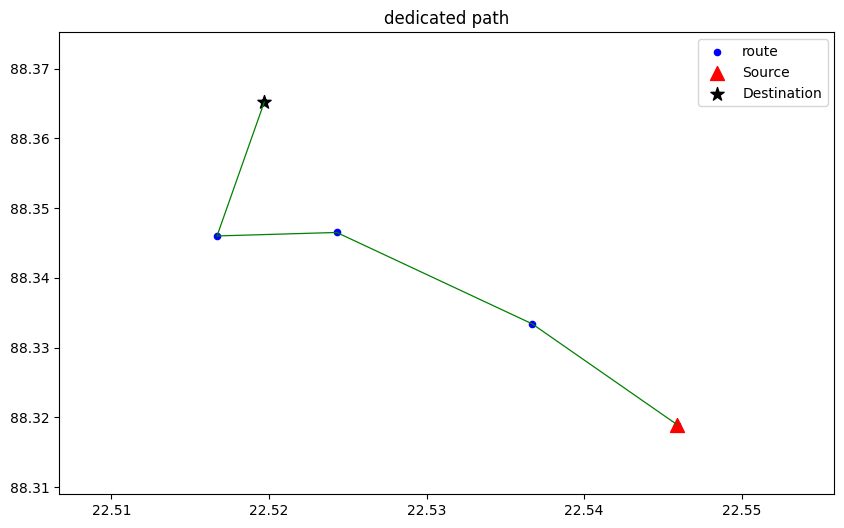

In [44]:

fig, ax = plt.subplots(figsize=(10, 6))
p = []
for x in path: 
    p.append(station_to_point(x))
    
zpoint_x = [x[0] for x in p]
zpoint_y = [y[1] for y in p]

# ax.scatter(Nodes_x, Nodes_y, label='other nodes', color='lightgray', alpha=0.5)
# ax.plot(edge_x, edge_y, color='pink', linestyle='-', linewidth=0.1, alpha=0.4)
ax.scatter(zpoint_x, zpoint_y, label='route', color='blue', s=20)
ax.plot(zpoint_x, zpoint_y, color='green', linestyle='-', linewidth=0.9)
ax.scatter(zpoint_x[0], zpoint_y[0], marker='^', color='red', label='Source', s=100)
ax.scatter(zpoint_x[len(zpoint_x)-1], zpoint_y[len(zpoint_y)-1], marker='*', color='black', label='Destination', s=100)

xlo = min(zpoint_x) - 0.01
xhi = max(zpoint_x) + 0.01
ylo = min(zpoint_y) - 0.01
yhi = max(zpoint_y) + 0.01

plt.xlim(xlo, xhi)
plt.ylim(ylo, yhi)

plt.title('dedicated path')
plt.legend()

# Show the plot
plt.show()
